In [1]:
# 导入所需的库
from bs4 import BeautifulSoup
import requests
import re
import os
import urllib
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from emoji import emojize
import numpy as np
# 解决 matplotlib 中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
# 从高德地图的API上获取广州地铁json数据的函数
def get_metro_data():
    url = 'http://map.amap.com/service/subway?_1469083453978&srhdata=4401_drw_guangzhou.json'
    html = urllib.request.urlopen(url)
    result = json.loads(html.read().decode("utf-8"))
    return result

In [3]:
# 获取地铁数据
gz_data = get_metro_data()

In [4]:
gz_data

{'s': '广州市地铁',
 'i': '4401',
 'l': [{'st': [{'rs': '435 975|435 975',
     'udpx': '432 975;438 975',
     'su': '1',
     'udsu': '1;1',
     'n': '西塱',
     'sid': '440100023043015',
     'p': '435 975',
     'r': '440100023049|440100023043',
     'udsi': '440100023049017;440100023050002',
     't': '1',
     'si': '440100023043015',
     'sl': '113.231978,23.065437',
     'udli': '440100023049;440100023050',
     'poiid': 'BV10024397',
     'lg': '4',
     'sp': 'xi ?'},
    {'rs': '435 939',
     'udpx': '438 939;432 939',
     'su': '1',
     'udsu': '1;1',
     'n': '坑口',
     'sid': '440100023049016',
     'p': '435 939',
     'r': '440100023049',
     'udsi': '440100023050003;440100023049016',
     't': '0',
     'si': '440100023049016',
     'sl': '113.232498,23.078878',
     'udli': '440100023050;440100023049',
     'poiid': 'BV10021881',
     'lg': '2',
     'sp': 'keng kou'},
    {'rs': '434 905',
     'udpx': '431 905;437 905',
     'su': '1',
     'udsu': '1;1',
     'n':

In [5]:
# 从获取的json数据中，提取相关字段并写入csv
for i in gz_data['l']:
    for j in i['st']:
        with open('./gz_metro_data.csv','a+') as f:
            f.write("广州市地铁"+','+i['ln']+','+j['n']+','+j['sl']+','+j['sp']+','+j['p']+','+j['t']+','+j['si']+','+j['udsi']+','+j['udli']+','+j['sid']+','+j['udpx']+','+j['lg']+','+j['poiid']+','+j['rs']+ '\n')

In [ ]:
# 定义dataframe列名称和读取gz_metro_data.csv
names = ['ln','n','x','y','sp','p','t','si','udsi','udli','sid','udpx','lg','poiid','rs']
gz_data = pd.read_csv('gz_metro_data.csv',engine='python',error_bad_lines=False,header=None, names = names)

In [ ]:
# 使用groupby方法，聚合地铁线路和线路对应的站点名称
gz_data_df = gz_data.groupby(["ln"])['n'].apply(list).reset_index()

In [ ]:
gz_data_df.head()

In [ ]:
# 把地铁线路和线路对应的站点，从dataframe中转成字典形式，存储每条线上的地铁站顺序
station_line = defaultdict(dict)
for ln,n in gz_data_df[['ln','n']].itertuples(index = False):
    station_line[ln] = n

station_line

In [ ]:
# stations是一个集合，存储所有地铁站点名称，已去重
stations = []
for i in gz_data_df['n'].values:
    #print(i)
    for j in i:
        stations.append(j)

In [ ]:
stations = set(stations)

In [ ]:
stations

In [19]:
# 创建connections空字典来存储连接
connections = dict()
# 将每个站点作为key放入字典
for s in stations:
    connections[s] = set()
# 遍历station_line.keys()，key为线路名称，如13号线
for key in station_line.keys(): # 生成实站网络
    # 获取线路里的站点个数，并遍历
    for i in range(len(station_line[key])):
        # i=0为首站，所以首站的领站只有1个站点
        if i == 0:
            connections[station_line[key][i]].add(station_line[key][i+1])
        elif i == len(station_line[key])-1:
            connections[station_line[key][i]].add(station_line[key][i-1])
        else:
            connections[station_line[key][i]].add(station_line[key][i-1])
            connections[station_line[key][i]].add(station_line[key][i+1])


In [20]:
connections

{'庆盛': {'东涌', '黄阁汽车城'},
 '红卫': {'新南', '新和'},
 '西场': {'中山八', '西村'},
 '钟村': {'汉溪长隆', '谢村'},
 '新城东': {'东平'},
 '镇龙北': {'汤村', '镇龙'},
 '林和西': {'体育中心南', '体育西路', '广州东站'},
 '中新': {'坑贝', '镇龙'},
 '坦尾': {'中山八', '如意坊', '河沙', '滘口'},
 '南桂路': {'桂城', '礌岗'},
 '同福西': {'凤凰新村', '文化公园'},
 '新港东': {'琶洲', '磨碟沙'},
 '磨碟沙': {'新港东', '赤岗'},
 '植物园': {'长湴', '龙洞'},
 '太和': {'夏良', '竹料'},
 '白云文化广场': {'白云公园', '萧岗'},
 '同和': {'京溪南方医院', '永泰'},
 '小北': {'广州火车站', '淘金'},
 '新沙': {'官湖'},
 '清布': {'清塘', '莲塘'},
 '新和': {'太平', '红卫', '马沥'},
 '机场南(1号航站楼)': {'机场北(2号航站楼)', '高增'},
 '沥滘': {'南洲', '厦滘', '大塘'},
 '太平': {'新和', '神岗'},
 '增城广场': {'钟岗'},
 '沙园': {'凤凰新村', '宝岗大道', '沙涌', '燕岗'},
 '黄阁汽车城': {'庆盛', '黄阁'},
 '体育中心': {'体育西路', '广州东站'},
 '华师': {'五山', '岗顶'},
 '北京路': {'团一大广场', '海珠广场'},
 '东晓南': {'南洲', '江泰路'},
 '广州南站': {'石壁'},
 '江夏': {'萧岗', '黄边'},
 '汉溪长隆': {'南村万博', '大石', '市桥', '钟村'},
 '香雪': {'萝岗'},
 '越秀公园': {'广州火车站', '纪念堂'},
 '燕塘': {'天平架', '天河客运站', '广州东站', '梅花园'},
 '神岗': {'太平', '赤草'},
 '柯木塱': {'高塘石', '龙洞'},
 '沙涌': {'沙园', '鹤洞'},
 '京溪南方医院': {'同和', '梅花园

In [21]:
data = pd.pivot_table(gz_data,index=['ln','n']).reset_index()

In [22]:
data.head()

,ln,n,lg,si,sid,t,x,y
0,13号线,南岗,2,900000071578006,900000071578006,0,113.541438,23.095253
1,13号线,南海神庙,4,900000071578004,900000071578004,0,113.497434,23.083718
2,13号线,双岗,4,900000071578003,900000071578003,0,113.474331,23.094468
3,13号线,夏园,4,900000071578005,900000071578005,0,113.518376,23.082901
4,13号线,官湖,0,900000071578010,900000071578010,0,113.636569,23.137226


In [23]:
data['x_y'] = tuple((x) for x in data[['x','y']].values.tolist())

In [24]:
# 把站点名称和站点对应的经纬度组合成字典；如： {'南岗': (113.54143799999999, 23.095253)}
station_location = defaultdict(dict)
for n,x_y in data[['n','x_y']].itertuples(index = False):
    station_location[n] = x_y

print(station_location)

defaultdict(<class 'dict'>, {'南岗': (113.54143799999999, 23.095253), '南海神庙': (113.49743400000001, 23.083718), '双岗': (113.474331, 23.094468), '夏园': (113.518376, 23.082901), '官湖': (113.636569, 23.137226000000002), '新塘': (113.604472, 23.131731), '新沙': (113.64941699999999, 23.136863), '沙村': (113.570399, 23.11059), '白江': (113.59562700000001, 23.123235), '裕丰围': (113.45501100000001, 23.094934), '鱼珠': (113.43226100000001, 23.100431), '东风': (113.600801, 23.566233), '从化客运站': (113.59472099999999, 23.531769), '嘉禾望岗': (113.289243, 23.237460000000002), '夏良': (113.32350500000001, 23.277704), '太和': (113.347197, 23.299284), '太平': (113.491955, 23.45209), '新和': (113.46706, 23.413259), '白云东平': (113.31784099999999, 23.251170000000002), '神岗': (113.51739599999999, 23.475101000000002), '竹料': (113.36833200000001, 23.348496), '赤草': (113.56025600000001, 23.50122), '钟落潭': (113.40068600000001, 23.375649), '马沥': (113.45038799999999, 23.393877), '何棠下': (113.54368799999999, 23.33119), '新南': (113.495228, 23.377232), '旺

F:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 1.0, '广州地铁线路图')

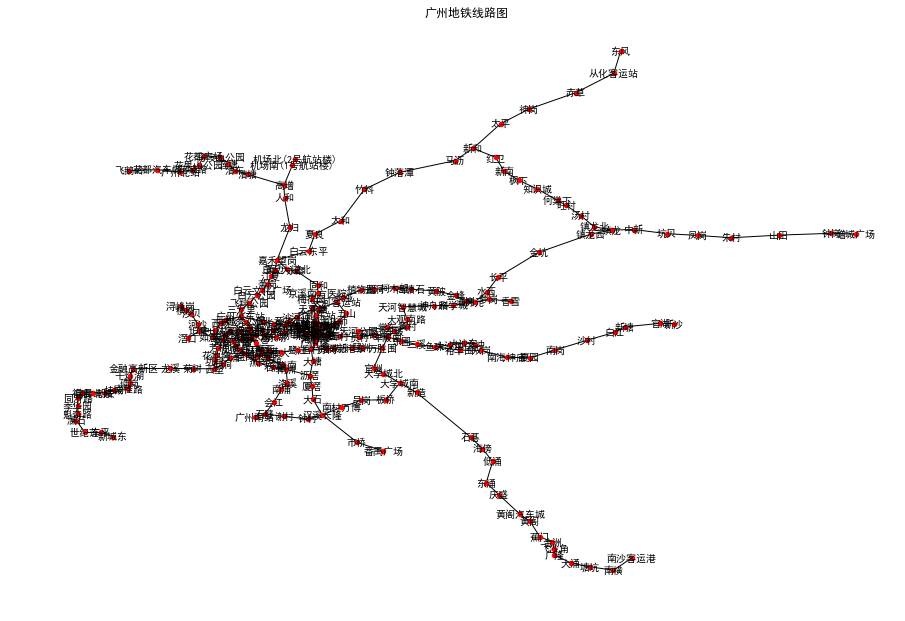

In [25]:
# 根据经纬度绘制广州地铁线路图
station_graph = nx.Graph(connections)                
station_graph.add_nodes_from(stations)
plt.figure(figsize=(12,8)) #创建一幅图
nx.draw(station_graph, station_location, with_labels=True, node_size=20, node_color='red',font_color='black',font_size=10,aphla=0.5) # draw a graph of station location
plt.title('广州地铁线路图')

In [26]:
# 试试把P值提取出来，用空格分隔，分别赋值给p_x，p_y，再转成int类型
gz_data['p_x'] = gz_data.p.apply(lambda x: x.split(' ')[0]).astype(int)
gz_data['p_y'] = gz_data.p.apply(lambda x: x.split(' ')[1]).astype(int)
# 由于画出来的图坐标与广州地铁官网的坐标显示不一致，需要对p_y坐标做水平翻转，
#所以用0-p_y达到想要的效果，与官网上显示得地铁图基本一致
gz_data['p_y'] = 0 - gz_data['p_y']

In [27]:
# 把p_x 和 p_y组合成元组p_x_y
gz_data['p_x_y'] = tuple((x) for x in gz_data[['p_x','p_y']].values.tolist())
# 把站点名称和站点对应的P值（网页上的坐标）组合成字典；如： {'西塱': (435, 975)}
station_location_pxy = defaultdict(dict)
for n,p_x_y in gz_data[['n','p_x_y']].itertuples(index = False):
    station_location_pxy[n] = p_x_y

print(station_location_pxy)

defaultdict(<class 'dict'>, {'西塱': (435, -975), '坑口': (435, -939), '花地湾': (434, -905), '芳村': (434, -874), '黄沙': (434, -843), '长寿路': (434, -809), '陈家祠': (506, -772), '西门口': (593, -773), '公园前': (680, -773), '农讲所': (740, -773), '烈士陵园': (803, -773), '东山口': (861, -773), '杨箕': (937, -774), '体育西路': (1001, -774), '体育中心': (1091, -713), '广州东站': (1001, -662), '广州南站': (652, -1275), '石壁': (715, -1228), '会江': (758, -1194), '南浦': (789, -1155), '洛溪': (788, -1123), '南洲': (788, -1091), '东晓南': (733, -1041), '江泰路': (694, -1013), '昌岗': (680, -984), '江南西': (680, -935), '市二宫': (680, -897), '海珠广场': (680, -844), '纪念堂': (680, -745), '越秀公园': (680, -721), '广州火车站': (680, -673), '三元里': (680, -640), '飞翔公园': (706, -593), '白云公园': (738, -564), '白云文化广场': (772, -534), '萧岗': (806, -504), '江夏': (838, -476), '黄边': (869, -448), '嘉禾望岗': (905, -416), '番禺广场': (1068, -1291), '市桥': (1034, -1260), '汉溪长隆': (1003, -1217), '大石': (1003, -1172), '厦滘': (1003, -1127), '沥滘': (1003, -1091), '大塘': (1002, -1039), '客村': (1002, -985), '广州塔': (

Text(0.5, 1.0, '广州地铁线路图')

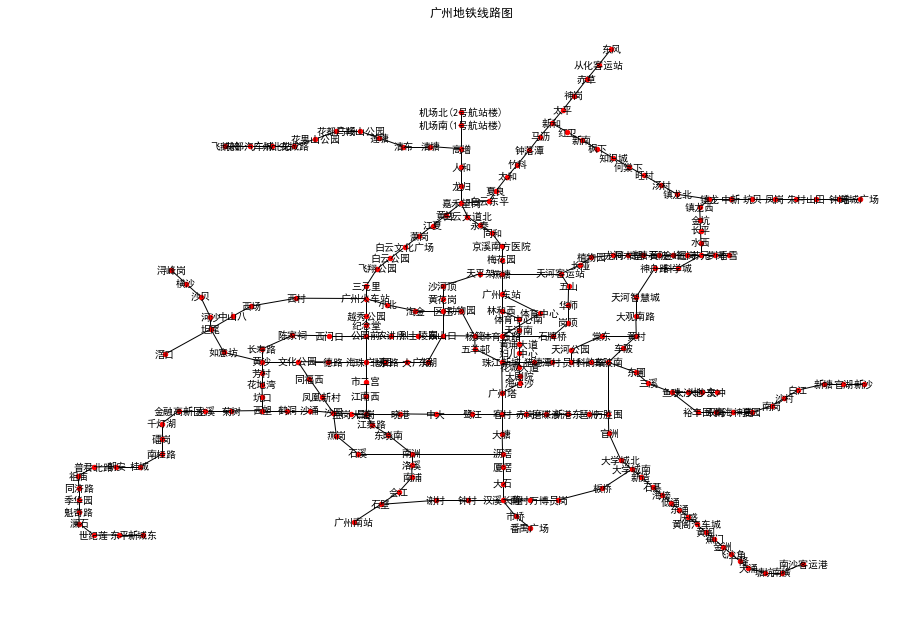

In [28]:
# 根据P值 绘制广州地铁线路图，基本还原了官网上显示得线路图
station_graph = nx.Graph(connections)                
station_graph.add_nodes_from(stations)
fig = plt.figure(figsize=(12,8)) #创建一幅图
nx.draw(station_graph, station_location_pxy, with_labels=True, node_size=20, node_color='red',font_color='black',font_size=10,aphla=0.5) # draw a graph of station location
plt.title('广州地铁线路图')


In [29]:
# 使用课程上的bfs算法
def search_bfs(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [30]:
# 使用emojize包，添加表情图案
def emojize_print(lst):
    return emojize(':four_leaf_clover: => ').join(lst)    

In [31]:
emojize_print(search_bfs(connections,'广州南站', '珠江新城'))

'广州南站🍀 => 石壁🍀 => 会江🍀 => 南浦🍀 => 洛溪🍀 => 南洲🍀 => 沥滘🍀 => 大塘🍀 => 客村🍀 => 广州塔🍀 => 珠江新城'

In [32]:
emojize_print(search_bfs(connections,'番禺广场', '三元里'))

'番禺广场🍀 => 市桥🍀 => 汉溪长隆🍀 => 大石🍀 => 厦滘🍀 => 沥滘🍀 => 大塘🍀 => 客村🍀 => 广州塔🍀 => 珠江新城🍀 => 体育西路🍀 => 杨箕🍀 => 东山口🍀 => 区庄🍀 => 淘金🍀 => 小北🍀 => 广州火车站🍀 => 三元里'

In [33]:
emojize_print(search_bfs(connections,'新城东', '东风'))

'新城东🍀 => 东平🍀 => 世纪莲🍀 => 澜石🍀 => 魁奇路🍀 => 季华园🍀 => 同济路🍀 => 祖庙🍀 => 普君北路🍀 => 朝安🍀 => 桂城🍀 => 南桂路🍀 => 礌岗🍀 => 千灯湖🍀 => 金融高新区🍀 => 龙溪🍀 => 菊树🍀 => 西塱🍀 => 坑口🍀 => 花地湾🍀 => 芳村🍀 => 黄沙🍀 => 如意坊🍀 => 坦尾🍀 => 中山八🍀 => 西场🍀 => 西村🍀 => 广州火车站🍀 => 三元里🍀 => 飞翔公园🍀 => 白云公园🍀 => 白云文化广场🍀 => 萧岗🍀 => 江夏🍀 => 黄边🍀 => 嘉禾望岗🍀 => 白云东平🍀 => 夏良🍀 => 太和🍀 => 竹料🍀 => 钟落潭🍀 => 马沥🍀 => 新和🍀 => 太平🍀 => 神岗🍀 => 赤草🍀 => 从化客运站🍀 => 东风'

### (Optional) Improve your agent to make it able to find a path based on different strategies
### 选做题

In [34]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [35]:
# 根据站点间的距离，获得最短路径
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [36]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_station_distance(path[i],path[i+1])
    return distance

In [37]:
# 计算两个站点间得距离
def get_station_distance(station1,station2):
    return geo_distance(station_location[station1],station_location[station2])

In [38]:
def search_bfs_op(graph,start,destination,search_strategy = sort_by_distance):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return path# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  
        

In [39]:
emojize_print(search_bfs_op(connections,'广州南站', '珠江新城'))

'广州南站🍀 => 石壁🍀 => 会江🍀 => 南浦🍀 => 洛溪🍀 => 南洲🍀 => 沥滘🍀 => 大塘🍀 => 客村🍀 => 广州塔🍀 => 珠江新城'

In [40]:
emojize_print(search_bfs_op(connections,'番禺广场', '三元里'))

'番禺广场🍀 => 市桥🍀 => 汉溪长隆🍀 => 大石🍀 => 厦滘🍀 => 沥滘🍀 => 南洲🍀 => 东晓南🍀 => 江泰路🍀 => 昌岗🍀 => 江南西🍀 => 市二宫🍀 => 海珠广场🍀 => 公园前🍀 => 纪念堂🍀 => 越秀公园🍀 => 广州火车站🍀 => 三元里'

In [41]:
emojize_print(search_bfs_op(connections,'新城东', '东风'))

'新城东🍀 => 东平🍀 => 世纪莲🍀 => 澜石🍀 => 魁奇路🍀 => 季华园🍀 => 同济路🍀 => 祖庙🍀 => 普君北路🍀 => 朝安🍀 => 桂城🍀 => 南桂路🍀 => 礌岗🍀 => 千灯湖🍀 => 金融高新区🍀 => 龙溪🍀 => 菊树🍀 => 西塱🍀 => 坑口🍀 => 花地湾🍀 => 芳村🍀 => 黄沙🍀 => 长寿路🍀 => 陈家祠🍀 => 西门口🍀 => 公园前🍀 => 纪念堂🍀 => 越秀公园🍀 => 广州火车站🍀 => 三元里🍀 => 飞翔公园🍀 => 白云公园🍀 => 白云文化广场🍀 => 萧岗🍀 => 江夏🍀 => 黄边🍀 => 嘉禾望岗🍀 => 白云东平🍀 => 夏良🍀 => 太和🍀 => 竹料🍀 => 钟落潭🍀 => 马沥🍀 => 新和🍀 => 太平🍀 => 神岗🍀 => 赤草🍀 => 从化客运站🍀 => 东风'

### 增加换乘，换乘次数排序，结合最短路径的优化

In [42]:
# 增加记录每个站点对应的线路，如：'季华园': {'广佛线'}   '汉溪长隆': {'3号线', '7号线'}
change_line = {}
for s in stations:
    change_line[s] = set()
for line, stations in station_line.items():
    for s in stations:
        change_line[s].add(line)

In [43]:
change_line

{'庆盛': {'4号线'},
 '红卫': {'14号线支线(知识城线)'},
 '西场': {'5号线'},
 '钟村': {'7号线'},
 '新城东': {'广佛线'},
 '镇龙北': {'14号线支线(知识城线)'},
 '林和西': {'3号线(北延段)', 'APM线'},
 '中新': {'21号线'},
 '坦尾': {'5号线', '6号线'},
 '南桂路': {'广佛线'},
 '同福西': {'8号线'},
 '新港东': {'8号线'},
 '磨碟沙': {'8号线'},
 '植物园': {'6号线'},
 '太和': {'14号线'},
 '白云文化广场': {'2号线'},
 '同和': {'3号线(北延段)'},
 '小北': {'5号线'},
 '新沙': {'13号线'},
 '清布': {'9号线'},
 '新和': {'14号线', '14号线支线(知识城线)'},
 '机场南(1号航站楼)': {'3号线(北延段)'},
 '沥滘': {'3号线', '广佛线'},
 '太平': {'14号线'},
 '增城广场': {'21号线'},
 '沙园': {'8号线', '广佛线'},
 '黄阁汽车城': {'4号线'},
 '体育中心': {'1号线'},
 '华师': {'3号线'},
 '北京路': {'6号线'},
 '东晓南': {'2号线'},
 '广州南站': {'2号线', '7号线'},
 '江夏': {'2号线'},
 '汉溪长隆': {'3号线', '7号线'},
 '香雪': {'6号线'},
 '越秀公园': {'2号线'},
 '燕塘': {'3号线(北延段)', '6号线'},
 '神岗': {'14号线'},
 '柯木塱': {'6号线'},
 '沙涌': {'广佛线'},
 '京溪南方医院': {'3号线(北延段)'},
 '新南': {'14号线支线(知识城线)'},
 '会江': {'2号线'},
 '暹岗': {'6号线'},
 '三溪': {'5号线'},
 '蕉门': {'4号线'},
 '西门口': {'1号线'},
 '体育西路': {'1号线', '3号线', '3号线(北延段)'},
 '飞沙角': {'4号线'},
 '烈士陵园': {'1号线'},
 '五羊邨': {'

In [44]:
# 为站点增加表情图案
def pretty_print():
    return emojize(":four_leaf_clover:")

# 为地铁线路增加表情图案
def pretty_print1():
    return emojize(":hibiscus:")

In [45]:
# 寻找换乘的算法，找到路线以后需要考虑寻找换乘的算法。
# 思路是寻找第一站与第二站的相同线路（这条线路有且只有一条，
# 这意味着乘客会在该线路上从第一站去第二站），再与第二站与
#第三站的相同线路进行比较，如果不同则意味着线路更改.
def change_routes(path):
    change = []
    for i in range(len(path)-2):
        change_1 = change_line[path[i+1]] - (change_line[path[i+1]] - change_line[path[i]])
        change_2 = change_line[path[i+2]] - (change_line[path[i+2]] - change_line[path[i+1]])
        if change_1 == change_2: continue
        else:
            node = '在'+ pretty_print1()+change_1.pop()+"  "\
            + pretty_print()+ path[i+1] +'  转  '+ pretty_print1()\
            + change_2.pop()+ "\n" # 打印换乘信息
            change.append(node)
    change = "".join(change)
    return change


In [46]:
# 为路线以换乘次数排序的算法，这里与上面的寻找换乘的算法类似，只不过这里返回的是换乘次数
def change_num(pathes):
    num = []
    for path in pathes:
        j = 0
        for i in range(len(path)-2):
            change_1 = change_line[path[i+1]] - (change_line[path[i+1]] - change_line[path[i]])
            change_2 = change_line[path[i+2]] - (change_line[path[i+2]] - change_line[path[i+1]])
            if change_1 == change_2: continue
            else:
                j += 1
        num.append(j)
    return num


In [54]:
# 从原有的search_bfs_op基础上，增加寻找换乘线路，换乘次数排序
def search(graph, start, destination, search_strategy = sort_by_distance):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return path# ！        
        successsors = graph[froniter]        
        for step in successsors:
            if step in path: continue  # check loop            
            new_path = path+[step]            
            pathes.append(new_path)  #bfs
            if step == destination: 
                # 打印换乘信息
                route = "从 "+pretty_print()+f"{start}"+"  上车  "+"\n"+ \
                change_routes(new_path)+"到"+pretty_print()+f"{destination}"+"  下车" 
                return route            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ！
        pathes = sorted(pathes, key=lambda x: change_num(pathes))
        

In [55]:
%%time
print(search(connections,'河沙', '五山'))

从 🍀河沙  上车  
在🌺6号线  🍀东山口  转  🌺1号线
在🌺1号线  🍀体育西路  转  🌺3号线
到🍀五山  下车
Wall time: 142 ms


In [57]:
%%time
print(search(connections,'广州南站', '珠江新城'))

从 🍀广州南站  上车  
在🌺2号线  🍀石壁  转  🌺2号线
在🌺2号线  🍀南洲  转  🌺广佛线
在🌺广佛线  🍀沥滘  转  🌺3号线
到🍀珠江新城  下车
Wall time: 18 ms


In [58]:
%%time
print(search(connections,'新城东', '东风'))

从 🍀新城东  上车  
在🌺广佛线  🍀西塱  转  🌺1号线
在🌺1号线  🍀公园前  转  🌺2号线
在🌺2号线  🍀嘉禾望岗  转  🌺14号线
到🍀东风  下车
Wall time: 589 ms
